In [7]:
#-----------------------------------------Lab 1 Part 3-------------------------------------------------
#******************************By Parush Garg (UBIT - parushga)****************************************
#First we install package twitteR and then use it as a library
#install.packages("twitteR")
library("twitteR")

In [8]:
#Below authentication token has been obtained by creating an account on twitter developer website.
setup_twitter_oauth("h4yIchStXOT438JZNHUglBmsK", "z7CKhKV7tSjTl6X0QLdTcIQzxkb08L1XvC8N6oLy6sM2O54DR6", 
            "137331207-WW4zl1zpYsdeRH4AO8IFKY8e9Vw7AeauLdh0exBl", "faFXmTaYveRaN3eRcuwLVg1FfZzjJGkwIKTfSsuF0wXUN")

[1] "Using direct authentication"


In [10]:
#Data is collected in the form of csv. Tags such as flu, sick, influenza have been used in order to collect 20000 tweets.
testData<-searchTwitter("#flu",5000, NULL, NULL, NULL, NULL, NULL, NULL, NULL)
testDataFrame <- twListToDF(testData)
head(testDataFrame)
write.csv(testDataFrame, file="NFluData1.csv", row.names = FALSE, na = "")

#Same is done for the remaining 15000 tweets and data is collected in the mentioned files.
#testData1<-searchTwitter("#sick",5000, NULL, NULL, NULL, NULL, NULL, NULL, NULL)
#testDataFrame1 <- twListToDF(testData1)
#head(testDataFrame1)
#write.csv(testDataFrame1, file="NSickData1.csv", row.names = FALSE, na = "")

#testData2<-searchTwitter("#influenza",5000, NULL, NULL, NULL, NULL, NULL, NULL, NULL)
#testDataFrame2 <- twListToDF(testData2)
#head(testDataFrame2)
#write.csv(testDataFrame2, file="NInfluenzaData1.csv", row.names = FALSE, na = "")
#dim(testDataFrame2)

#testData3<-searchTwitter("#flu",4000, NULL, NULL, NULL, NULL, NULL, NULL, NULL)
#testDataFrame3 <- twListToDF(testData3)
#head(testDataFrame3)
#write.csv(testDataFrame3, file="NFluData2.csv", row.names = FALSE, na = "")

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
RT @GSK: Why you should consider getting the #flu vaccine. Not just for yourself – but for those closest to you. https://t.co/oviFNU2xti,FALSE,0,NA,2018-03-04 15:21:00,FALSE,NA,970318196313075712,NA,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",Hermasa,1,TRUE,FALSE,NA,NA
"It would seem that the jury is not completely out on how long a #flu is contagious for. Alas, use common sense:… https://t.co/qZqtccwUFn",FALSE,0,NA,2018-03-04 15:18:29,TRUE,NA,970317561991745542,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",nursemore4,0,FALSE,FALSE,NA,NA
Tidur Cukup 8 Jam Per Hari Bisa Memperkuat Tubuh Dari Serangan Flu. #Tidur #Flu #Sehat #InfoSehat #Kesehatan #TipsSehat,FALSE,0,NA,2018-03-04 15:15:35,FALSE,NA,970316832530882560,NA,"<a href=""http://twittbot.net/"" rel=""nofollow"">twittbot.net</a>",Tiens_Surabaya_,0,FALSE,FALSE,NA,NA
Why Is The #Flu So Bad This Year? https://t.co/jMYBQW7ayy,FALSE,0,NA,2018-03-04 15:15:07,FALSE,NA,970316717988679681,NA,"<a href=""http://www.hootsuite.com"" rel=""nofollow"">Hootsuite</a>",GetReliant,0,FALSE,FALSE,NA,NA
"RT @nycHealthy: The #flu vaccine remains the best way to protect against the influenza virus. For a limited time, @Walgreens is offering FR…",FALSE,0,NA,2018-03-04 15:13:49,FALSE,NA,970316390740713478,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",newyorkheadline,2,TRUE,FALSE,NA,NA
"RT @nycHealthy: The #flu vaccine remains the best way to protect against the influenza virus. For a limited time, @Walgreens is offering FR…",FALSE,0,NA,2018-03-04 15:11:58,FALSE,NA,970315922413051905,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",vanessaferrel,2,TRUE,FALSE,NA,NA


In [38]:
#dataframe is reated in the name of userlocation
users.data2 <- lookupUsers(testDataFrame1$screenName)
user <- twListToDF(users.data2)
userLocation2 <- user$location
head(userLocation2)

#data is cleaned by removing NULL values and stored in a csv file.
#Files created are LocationsFluData1.csv, LocationsFluData2.csv, LocationsFluData3.csv and LocationsFluData4.csv
userLocation_clean2 = userLocation2[userLocation2 != '']
userLocation_clean_dataFrame2 <- as.data.frame(userLocation_clean2)
write.csv(userLocation_clean_dataFrame2, file="LocationsFluData2.csv", row.names = FALSE, na = "")
head(userLocation_clean_dataFrame2)

#This process is repeated for 4 times with different files as mentioned above.

[1] "Warwick UK"          "UK"                  ""                   
[4] "bournemouth england" ""                    ""

userLocation_clean2
Warwick UK
UK
bournemouth england
"New Hampshire, USA"
not in the kitchen
"Schenectady, NY"


In [21]:
#Google restricts requests to 2500 requests a day hence data is cleaned after this cell execution.
library("ggmap")  
library("maptools")
library(maps)
loc1 <- read.csv(file="LocationsFluData2.csv",head=TRUE,sep=",")

#Total count of the locations
dim(loc1)
head(loc1)
geoloc1 <- geocode(as.character(loc1$userLocation_clean2))

[1] 2956    1

userLocation_clean2
Warwick UK
UK
bournemouth england
"New Hampshire, USA"
not in the kitchen
"Schenectady, NY"


ERROR: Error: google restricts requests to 2500 requests a day for non-business use.


In [16]:
#Cleaned data has been saved in the files GeoLocationsFluData1.csv, GeoLocationsFluData2.csv, GeoLocationsFluData3.csv and GeoLocationsFluData4.csv
#Below is an example of file GeoLocationsFluData1.csv
#Output of latitude and logitude is stored in LatLong1.csv, LatLong2.csv, LatLong3.csv and LatLong4.csv

loc1 <- read.csv(file="GeoLocationsFluData1.csv",head=TRUE,sep=",")
#dim(loc1)
head(loc1)
geoloc1 <- geocode(as.character(loc1$userLocation_clean1))
geolocna <- na.omit(geoloc1)
write.csv(geolocna, file = "LatLong1.csv",row.names=FALSE, na="")
head(geolocna)



userLocation_clean1
Massachusetts
Ottawa ON CANADA
"Philadelphia, PA"
"Brooklyn, NY"
"Silver Spring, MD"
"Cheshire UK, not Cat"


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Massachusetts&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Massachusetts"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ottawa%20ON%20CANADA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Philadelphia,%20PA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Philadelphia, PA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brooklyn,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Brooklyn, NY"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Silver%20Spring,%20MD&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cheshire%20UK,%20not%20Cat&sensor=false
Warning message:
“geocode failed with status OVER_QU

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Somewhere in the world"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=MEDIA,%20Pa.&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Springfield,%20IL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Springfield, IL"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Philadelphia,%20PA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago%20suburbs&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chicago suburbs"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kingwood,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lehigh%20Valley,%20PA/NJ&sensor=false
Information from URL : http://maps.googleapis.co

“geocode failed with status OVER_QUERY_LIMIT, location = "40.47, 73.58"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ottawa,%20Ontario&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta,%20GA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cuman%EF%BF%BD%EF%BF%BD&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cuman��"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Northern%20California&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Burton-On-Trent&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Burton-On-Trent"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Lexington, KY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ottawa,%20Ontario&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=American%20Redoubt&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Poulsbo,%20WA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Shetland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ontario,%20Canada&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Philadelphia,%20PA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Philadelphia, PA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ithaca,%20New%20York&sensor=false
Warning message:
“geocode failed with status

“geocode failed with status OVER_QUERY_LIMIT, location = "www.dfwvapor.com/contact-us/"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=UK&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Izmir-Turkey&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arlington,%20VA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Arlington, VA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tucson,Az.%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=nyc&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "nyc"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sioux%20Falls,%20S.D.&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arlington,%20VA&sensor=fals

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "iPhone: 52.361168,4.894472"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Miami,%20FL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Miami, FL"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minneapolis&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Minneapolis"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ile-de-France,%20France&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ile-de-France, France"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Canada&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?addres

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=www.writersprofitguide.com&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "www.writersprofitguide.com"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pittsburgh,%20Baltimore,%20NYC&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Pittsburgh, Baltimore, NYC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=SF%20Bay%20Area&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NeverneverLand,%20Here&There&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "NeverneverLand, Here&There"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Massena,%20N.Y.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Massena, N.Y."”.Information from URL :

“geocode failed with status OVER_QUERY_LIMIT, location = "The Netherlands"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago,%20IL&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Scottsdale,%20AZ&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minneapolis&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quito,%20Ecuador%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rome,%20Lazio&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rome, Lazio"”In

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Debbie@Dagimagesnyc.Com"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=san%20francisco,%20ca&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Swish%20Alps&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "The Swish Alps"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, lo

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=blackburn&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Shorewood%20,%20WI&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Singapore&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wilkes%20Barre,%20PA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Wilkes Barre, PA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Qu%EF%BF%BD%EF%BF%BDbec,%20Canada&sensor=false
Information from URL : http://maps

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Davao%20City,%20Davao%20Region&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Davao City, Davao Region"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Spartanburg,%20SC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Washington, DC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Denver,%20Colorado&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Denver,%20Colorado&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Denver, Colorado"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
Information from URL : http://

“geocode failed with status OVER_QUERY_LIMIT, location = "Bronx, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Southfield,%20MI&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oklahoma%20City,%20OK&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Oklahoma City, OK"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pendle&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pendle"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Binghamton,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Antioch%20&%20Walnut%20Creek,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Jose,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Sa

“geocode failed with status OVER_QUERY_LIMIT, location = "University of Saskatchewan"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Haven,%20CT,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New Haven, CT, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Storrs,%20CT&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=baltimore&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "baltimore"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington%20DC%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Harare%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Silver%20Spring,%20MD&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "San Francisco"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington%20DC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=HI%20NC,%20Pitt%20PA,%20Gwd%20SC,%20CA,%20NH&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "HI NC, Pitt PA, Gwd SC, CA, NH"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Annacloy,%20Co%20Down,%20N.%20Ireland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Michigan,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Michigan, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Emporia,%20Eureka%20&%20Madison,%

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bellingham, WA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Germany&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Germany"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=College%20Park,%20GA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "College Park, GA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=UK-%20Wales&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Washington, DC"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Earth&sensor=false


“geocode failed with status OVER_QUERY_LIMIT, location = "Lancaster County, PA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Omaha,%20NE&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=UCF&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "UCF"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bothell,%20WA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Dallas,%20TX%20&%20Frisco,%20TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Naperville,%20IL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Naperville, IL"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Leicester-Romania&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Leicester-Romania"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Tan%20Valley%20Arizona&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "San Tan Valley Arizona"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=In%20your%20wcw%20dms&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "In your wcw dms"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wolverhampton!&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Murray,%20Kentucky&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Murray, Kentucky"”Information from URL : http://maps.googleapis.com/m

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=5161%20Richmond%20Street,%20Miami&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Holly%20Land&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Holly Land"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vespasiano%20&%20BH&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sacramento,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Delaware,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Delaware, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=heart%20of%20screenland&sensor=false
Warning message:
“geocode failed with st

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nova%20Europa&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=K%EF%BF%BD_penick%20Versailles&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "K�_penick Versailles"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=the%20Netherlands&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Blacksburg,%20VA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=M(E)&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "M(E)"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Earth&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?addres

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Northwest%20Arkansas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Louisville,%20KY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manhattan,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Manhattan, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tennessee,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lewiston/Auburn,%20Maine&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Charlottesville,%20VA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Yulee,%20FL&sensor=false
Information from URL : http:

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=I%20left%20my%20heart%20in%20Montana&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sacramento,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Menlo%20Park,%20CA%20%7C%20Washington%20DC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ashland,%20OR,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=montego%20bay,%20jamaica&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Las%20Vegas,%20NV&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Planet%20Earth&sensor

“geocode failed with status OVER_QUERY_LIMIT, location = "Des Moines, Iowa"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Aston,%20Pennsylvania&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Narberth,%20PA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Louisiana,%20USA;%20MS,%20TX,&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Louisiana, USA; MS, TX,"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Stephenville,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rhode%20Island&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Austin,TX&sensor=false
.Information from URL : http://maps.googleap

“geocode failed with status OVER_QUERY_LIMIT, location = "Rhode Island"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Billerica,%20MA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Billerica, MA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wiltshire&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Wiltshire"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bonnie%20Scotland&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Delmarva,%20MD&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”Information 

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lebanon&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nashville,%20TN&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Nashville, TN"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cardiff&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington%20DC%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Providence,%20RI&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Reading,%20Pennsylvania&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Reading, Pennsylvania"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=UK&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIM

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "South Wales"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pripyat&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Norfolk&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "North Norfolk"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kingston,%20Jamaica&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Huntsville,%20Alabama&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Reading,%20PA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lafayette,%20IN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Near%20Earth%20Orbit&sensor=false
Warning message:
“geocode failed with status OVER_

“geocode failed with status OVER_QUERY_LIMIT, location = "Estepona. M��laga. Espa��a"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Harrisburg,%20Pa.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Harrisburg, Pa."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Caracas,%20Venezuela&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ici%20et%20ailleurs&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Undisclosed%20Location%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Undisclosed Location "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle,%20WA&sensor=false
Warning message:
“geocode failed with status

“geocode failed with status OVER_QUERY_LIMIT, location = "Wales"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Essen,%20Ruhrgebiet,%20Germany&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gas%20City,%20IN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nashua,%20NH&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dallas, TX"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20a%20motorcycle&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Elizabeth,%20New%20Jersey&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kentucky&sensor=false
Information from URL : http://maps.googleapis.com/maps/a

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Deerfield,%20IL&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Troutman,%20NC%20Mooresville,%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Troutman, NC Mooresville, NC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cardiff%20Met%20University&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Notre%20Dame,%20IN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dunn%20and%20Fayetteville,%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dunn and Fayetteville, NC"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas%

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Washington, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=manchester&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "manchester"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cymru&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NYC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "NYC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ireland%20/UK/LA%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ireland /UK/LA "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cheshire,%20United%20Kingdom&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cheshire, United Kingdom"”.Informat

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Venezuela"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montana,%20Out%20Here,%20USA,%20Earth&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Montana, Out Here, USA, Earth"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Southern%20California&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Southern California"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NoVA,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=West%20Chester,%20PA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "West Chester, PA"”.Information from URL : http://maps.googlea

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New Hampshire"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=East%20Coast%20to%20West%20Coast&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salinas,%20California&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Salinas, California"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,%20Texas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pittsburgh,%20PA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles-NYC-London%20and%20Skype&sensor=false
Warning message:
“ge

“geocode failed with status OVER_QUERY_LIMIT, location = "University Hospital Waterford"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=500%20West%20120%20St%20New%20York,%20NY%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Whanganui,%20Aotearoa%20(NZ)&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=333%20Delaware%20Ave,%20Delmar%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "333 Delaware Ave, Delmar NY"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York, NY, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor

“geocode failed with status ZERO_RESULTS, location = "Kerava Poland"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cary,%20North%20Carolina&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago%20suburbs&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=AZ.&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ottawa,%20Canada&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ottawa, Canada"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ile-de-France,%20France&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ile-de-France, France"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Un

“geocode failed with status OVER_QUERY_LIMIT, location = "Northern California"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hampton,%20VA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Emerald%20Coast&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Yorktown,%20VA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Jersey&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Torrance&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=University%20Health%20Service%20&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Auburn,%20Ala.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Auburn, Ala."”Information from URL : http://maps.googleapis.com/maps/api/ge

“geocode failed with status OVER_QUERY_LIMIT, location = "Washington, DC"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Stamford,%20CT&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Socorro,%20NM&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Socorro, NM"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Worldwide&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Not%20Russia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montana%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Diego,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Providence,%20RI&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arl

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Virginia,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montross,%20VA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Frederiksberg&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20Kingdom&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Albuquerque,%20NM%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Boston"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20D.C.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Washington, D.C."”.Information from URL : http://maps.googleapis.com/maps/api

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Wakefield, RI"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas/Fort%20Worth%20Area&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dallas/Fort Worth Area"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Los Angeles, CA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Delaware&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Delaware"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Netherlands&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Muncie,%20IN&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nor

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago%20-%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santiago - Chile"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bangkok&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bangkok"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bolton&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bolton"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nairobi,%20Kenya&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Nairobi, Kenya"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=UK&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "UK"”.Information from URL : http://maps.googleapis

“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ending%20Bitches%20Careers,%20LA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ending Bitches Careers, LA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Deutschland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Deutschland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bowling%20Green,%20OH&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bowling Green, OH"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Deep%20in%20the%20Heart,%20TX,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Deep in the Heart, TX, USA"”.Information from URL : http://maps.googleapis.com/maps/api/g

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Lund, Sweden"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brasil&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cleveland,%20OH&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mississauga,%20Ontario&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Mississauga, Ontario"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Georgetown,%20Guyana&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Syracuse,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Syracuse, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Syracuse,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, loc

“geocode failed with status OVER_QUERY_LIMIT, location = "Somewhere, Ohio"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seaford&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%D4%AB%EF%BF%BD%EF%BF%BD%EF%BF%BD_%D4%B1%EF%BF%BD_%20%D4%AB%D4%8E%D4%8E%EF%BF%BD%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD%D4%82%D4%B1&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "ԫ���_Ա�_ ԫԎԎ���_��ԂԱ"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Neonatal%20Unit%20Kingston%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Neonatal Unit Kingston "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mumbai&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Belfast&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Be

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Polk%20County,%20FL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Polk County, FL"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Philadelphia,%20PA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston%20Texas&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Belize%20City,%20Belize%20C.A.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Belize City, Belize C.A."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jonesborough,%20TN&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Jonesborough, TN"”Information from URL : http://ma

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Anamosa,%20IA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Applecross,%20Highlands&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Virginia,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Newcastle.%20UK.&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago,%20IL&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California%20City&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lenexa,%20KS&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Radcliffe%20,Greater%20Manchester.&sensor=false
I

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Philadelphia,%20PA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kinross,%20Scotland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ottawa,%20Canada&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kansas%20City,%20MO&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Northwest%20Amexem&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Northwest Amexem"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=MN&sensor=false
Information from URL : http://maps

“geocode failed with status OVER_QUERY_LIMIT, location = "Chicago, IL"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas%20Duh&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sw5%20earls%20court%20london&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sacramento,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Earth&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lowell,MA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Lowell,MA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Baltimore%20/%20DC%20Metro&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fresno,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?ad

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Warrington&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Warrington"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Parsippany,%20NJ&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Parsippany, NJ"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Global"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Louisville,%20KY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bogot%EF%BF%BD%EF%BF%BD,%20D.C.,%20Colombia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=2440%20N%20Josey%20Ln.%20Ste%20102&sensor=false
Warning message:
“geocode failed with status O

query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total

,lon,lat
2,-75.69719,45.42153
5,-77.02609,38.99067
8,-78.45871,38.25375
14,-96.17025,32.26792
17,-122.12514,48.19871
18,-79.01930,35.75957


In [3]:
#Aggregating all the latitudes and longitudes present in the files and binding to one data frame which is latlong.
latlong1 <- read.csv(file="LatLong1.csv",head=TRUE,sep=",") #use all the files for conversion
latlong2 <- read.csv(file="LatLong2.csv",head=TRUE,sep=",") #use all the files for conversion
latlong3 <- read.csv(file="LatLong3.csv",head=TRUE,sep=",") #use all the files for conversion
latlong4 <- read.csv(file="LatLong4.csv",head=TRUE,sep=",") #use all the files for conversion

latlong <- rbind(latlong1,latlong2,latlong3,latlong4) #combine all dataframes
dim(latlong)

[1] 4928    2

In [1]:
#pointsdf <- as.data.frame(points)

#conversion from geocodes to state codes in order to group locations by state
#source:  http://stackoverflow.com/questions/8751497/latitude-longitude-coordinates-to-state-code-in-r
library(maps)
library(sp)    
library(maptools)

#dat <- read.csv(file="/Users/arunchandrapendyala/Desktop/geolocdf4.csv",head=TRUE,sep=",") #use all the files for conversion


# The single argument to this function, pointsDF, is a data.frame in which:
#   - column 1 contains the longitude in degrees (negative in the US)
#   - column 2 contains the latitude in degrees

latlong2state <- function(pointsDF) {
    # Prepare SpatialPolygons object with one SpatialPolygon
    # per state (plus DC, minus HI & AK)
    states <- map('state', fill=TRUE, col="transparent", plot=FALSE)
    IDs <- sapply(strsplit(states$names, ":"), function(x) x[1])
    states_sp <- map2SpatialPolygons(states, IDs=IDs,
                     proj4string=CRS("+proj=longlat +datum=WGS84"))

    # Convert pointsDF to a SpatialPoints object 
    pointsSP <- SpatialPoints(pointsDF, 
                    proj4string=CRS("+proj=longlat +datum=WGS84"))

    # Use 'over' to get _indices_ of the Polygons object containing each point 
    indices <- over(pointsSP, states_sp)

    # Return the state names of the Polygons object containing each point
    stateNames <- sapply(states_sp@polygons, function(x) x@ID)
    stateNames[indices]
}

Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


In [4]:
#Obtaining the state frequencies
stateloc <- latlong2state(latlong)
state <- table(stateloc)   #table is used to find grouping of states with corresponding frequencies
statedata <- as.data.frame(state)
statedata

stateloc,Freq
alabama,12
arizona,64
arkansas,17
california,323
colorado,47
connecticut,30
delaware,10
district of columbia,93
florida,137
georgia,94


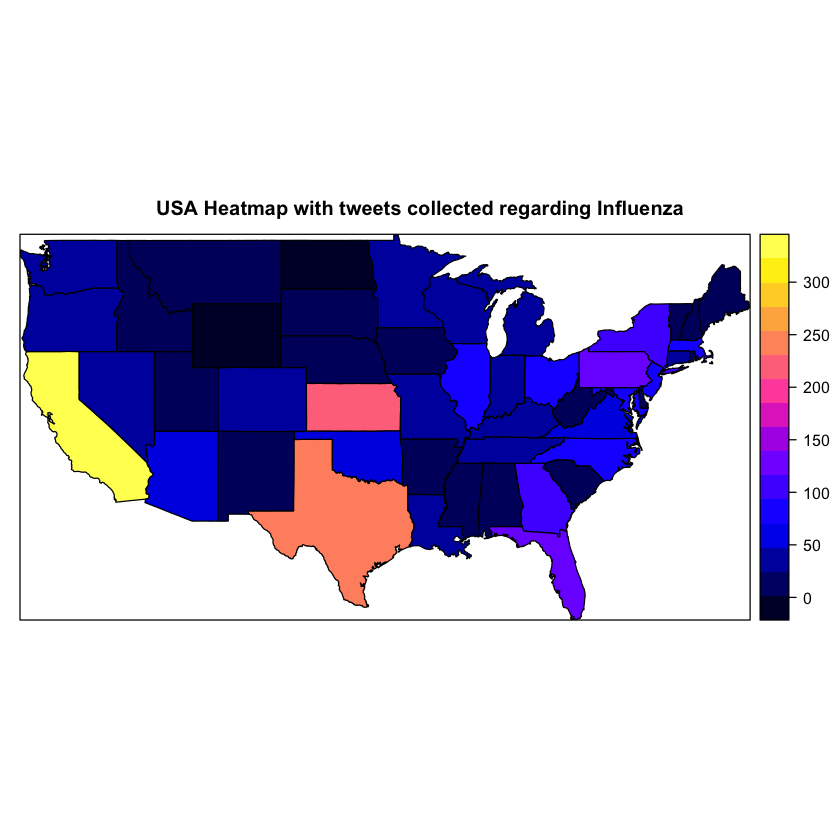

In [6]:
#Source : https://stackoverflow.com/questions/8537727/create-a-heatmap-of-usa-with-state-abbreviations-and-characteristic-frequency-in
#Using sp library to plot the heat map of USA

library(maps)
library(maptools)
library(sp)

mapUSA <- map('state',  fill = TRUE,  plot = FALSE)
nms <- sapply(strsplit(mapUSA$names,  ':'),  function(x)x[1])
USApolygons <- map2SpatialPolygons(mapUSA,  IDs = nms,  CRS('+proj=longlat'))
    
idx <- match(unique(nms),  statedata$stateloc)
dat2 <- data.frame(value = statedata$Freq[idx], state = unique(nms))
row.names(dat2) <- unique(nms)

USAsp <- SpatialPolygonsDataFrame(USApolygons,  data = dat2)
    
spplot(USAsp['value'], main=list(label="USA Heatmap with tweets collected regarding Influenza",cex=1, bty='n', title.adj=0.15))
    


In [29]:
#**************************************Below code is all for the testing purposes and has been used in order to plot the above data
#They are all related to what is done above. It is about the repetition to get all the data for heatmap of USA.

testData<-searchTwitter("#sick",4000, NULL, NULL, NULL, NULL, NULL, NULL, NULL)
testDataFrame <- twListToDF(testData)
head(testDataFrame)
write.csv(testDataFrame, file="SickData.csv", row.names = FALSE, na = "")

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
@girl4_trump @YMimmo @realDonaldTrump That’s for sure. What a disgrace that Dems want America to fail because of a party affiliation.#Sick,FALSE,0,girl4_trump,2018-02-22 06:32:22,FALSE,966481177111560192,966561285599985664,18704545,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>",flywaytomuch_7m,0,FALSE,FALSE,NA,NA
A table of mine had a bill of $490 and tipped $3 along with a signature reading “DADDY” #sick,FALSE,0,NA,2018-02-22 06:29:09,FALSE,NA,966560472861298689,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",MitchSaavedra2,0,FALSE,FALSE,NA,NA
RT @andyvblue: Welcome to P.M. Sharia May's Britain! #sick https://t.co/1C8CAypugf,FALSE,0,NA,2018-02-22 06:28:48,FALSE,NA,966560384000897024,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",descass,135,TRUE,FALSE,NA,NA
"RT @ccrezee: Yes #SICK ening! #False #prophets #ensure the #DOG s #CAT s #HORSE s (#Domestic #ANIMALS) #suffer #die, just as #soldiers &amp; ""o…",FALSE,0,NA,2018-02-22 06:28:38,FALSE,NA,966560342347313153,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Lite</a>",Barohm1,7,TRUE,FALSE,NA,NA
RT @andyvblue: Welcome to P.M. Sharia May's Britain! #sick https://t.co/1C8CAypugf,FALSE,0,NA,2018-02-22 06:26:27,FALSE,NA,966559793795170304,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",yidarmy05913812,135,TRUE,FALSE,NA,NA
@AnnCoulter You are #sick to come after these kids and family! #goaway #youaretheproblem ! #whodoesthis #low #scum… https://t.co/FpLcAw10m1,FALSE,0,AnnCoulter,2018-02-22 06:22:59,TRUE,966526192538017792,966558923451805696,196168350,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Rachjr1,0,FALSE,FALSE,NA,NA


In [47]:
library("ggmap")
library("maptools")
library(maps)
geouserlocations <- geocode(userLocation_clean_dataFrame)
geouserlocationsna <- na.omit(geouserlocations)
#head(userLocation_clean_dataFrame)


ERROR: Error: is.character(location) is not TRUE


In [ ]:
loc_clean <- locations[locations!='']

In [52]:
#testData<-searchTwitter("#influenza",5000, NULL, NULL, NULL, NULL, NULL, NULL, NULL)
#testDataFrame <- twListToDF(testData)
#head(testDataFrame)
#write.csv(testDataFrame, file="FluData2.csv", row.names = FALSE, na = "")

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
RT @GadgTecs: Can Smart Tools Outsmart The Smartest Virus On The Planet? - #fly #influenza #cold https://t.co/GNB88qV04D,FALSE,0,NA,2018-03-02 01:57:26,FALSE,NA,969391195246944256,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Lite</a>",MarivelSander19,24,TRUE,FALSE,NA,NA
. @Penn investigators isolate and characterize a type of lung #stemcell in mice and humans that is essential for re… https://t.co/IP3Nz6HEyO,FALSE,1,NA,2018-03-02 01:55:06,TRUE,NA,969390610611400705,NA,"<a href=""http://www.hootsuite.com"" rel=""nofollow"">Hootsuite</a>",GENbio,0,FALSE,FALSE,NA,NA
"RT @Salud_CZ6: En #Gualaquiza y #SanJuanBosco, @Salud_CZ6 la campaña de vacunación contra la #Influenza se ejecutará hasta el 31 de marzo.…",FALSE,0,NA,2018-03-02 01:54:54,FALSE,NA,969390559034036224,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Cristian_Macas,11,TRUE,FALSE,NA,NA
"RT @Salud_CZ6: En #Gualaquiza y #SanJuanBosco, @Salud_CZ6 la campaña de vacunación contra la #Influenza se ejecutará hasta el 31 de marzo.…",FALSE,0,NA,2018-03-02 01:54:43,FALSE,NA,969390514008219648,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Adriana60301809,11,TRUE,FALSE,NA,NA
"RT @Salud_Ec: Hasta la semana epidemiológica 8 se registran 723 casos de Dengue, 1 caso de Chikungunya y 141 de Malaria. Para #Influenza ex…",FALSE,0,NA,2018-03-02 01:53:35,FALSE,NA,969390228367724544,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",MejiaGalia,43,TRUE,FALSE,NA,NA
Frequently Asked Flu Questions 2017-2018 #Influenza Season https://t.co/ixSeDunEb5,FALSE,1,NA,2018-03-02 01:25:55,FALSE,NA,969383265286152192,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",code3rockport,0,FALSE,FALSE,NA,NA


In [36]:
#testDataFrame2 <- read.csv(file="FluData1.csv",head=TRUE,sep=",")
#head(testDataFrame2)

testDF2 <- twListToDF(testDataFrame2)
users.data <- lookupUsers(testDF2$screenName)
user2 <- twListToDF(users.data)
userLocation2 <- user2$location

#userLocation_clean2 = userLocation2[userLocation2 != '']
#userLocation_clean_dataFrame2 <- as.data.frame(userLocation_clean2)
#write.csv(userLocation_clean_dataFrame2, file="LocationsFluData2.csv", row.names = FALSE, na = "")
#head(userLocation_clean_dataFrame2)


ERROR: Error in twListToDF(testDataFrame2): Not all elements of twList are of the same class


In [38]:
users.data2 <- lookupUsers(testDataFrame1$screenName)
user <- twListToDF(users.data2)
userLocation2 <- user$location
head(userLocation2)

userLocation_clean2 = userLocation2[userLocation2 != '']
userLocation_clean_dataFrame2 <- as.data.frame(userLocation_clean2)
write.csv(userLocation_clean_dataFrame2, file="LocationsFluData2.csv", row.names = FALSE, na = "")
head(userLocation_clean_dataFrame2)

[1] "Warwick UK"          "UK"                  ""                   
[4] "bournemouth england" ""                    ""

userLocation_clean2
Warwick UK
UK
bournemouth england
"New Hampshire, USA"
not in the kitchen
"Schenectady, NY"


In [5]:
loc2 <- read.csv(file="GeoLocationsFluData2.csv", head=TRUE, sep=",")
#head(loc2)
geoloc2 <- geocode(as.character(loc2$userLocation_clean2))
geoloc2na <- na.omit(geoloc2)
head(geoloc2na)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Hampshire,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Schenectady,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Schenectady, NY"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Peru&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Blue%20Springs,%20MO&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Romford&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=WORLDWIDE&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "WORLDWIDE"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=MIA%20living,New%20Orleans%20native&sensor=false
Information from URL : http://maps.googleapis.com/

“geocode failed with status OVER_QUERY_LIMIT, location = "Oakwood (Dayton), Ohio"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nairobi&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Nairobi"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Imus%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Imus "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Argentina%20-%20Buenos%20Aires%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Argentina - Buenos Aires "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Los Angeles"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ohio,%20USA&sensor=false
Warning message:

“geocode failed with status OVER_QUERY_LIMIT, location = "Baltimore, Md"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Location:%20Up%20to%20mother%20nature&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Location: Up to mother nature"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dramatic%EF%BF%BD%E1%B4%8A_%CF%8C%EF%BF%BD%EF%BF%BD&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dramatic�ᴊ_ό��"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=kollam&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "kollam"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Canc%CC%BCn,%20M%CC%A9xico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Canc̼n, M̩xico"”.Information from URL : http://maps.googleapis.com/maps/

“geocode failed with status OVER_QUERY_LIMIT, location = "Huntington Beach, CA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=pampanga&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "pampanga"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nashville,%20TN&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Nashville, TN"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jersey%20Village,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Jersey Village, TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Virginia%20Beach,%20VA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Virginia Beach, VA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gulf%20Shores,%20AL&sensor=

“geocode failed with status OVER_QUERY_LIMIT, location = "The endles void of incarnation"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Florida"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Anonymous%20Planet&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Anonymous Planet"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Golden%20Gate,%20FL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Golden Gate, FL"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Edmonton,%20Alberta&sensor=false
Warning 

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Texas, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wallkill,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Wallkill, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle,%20WA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Seattle, WA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oregon,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Oregon, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Norwich%20&sensor=false
Warning message:
“

“geocode failed with status OVER_QUERY_LIMIT, location = "Manchester"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Delhi,%20Delhi&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New Delhi, Delhi"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Florida, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Piraeus,%20Greece&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Piraeus, Greece"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lanaken,%20Limburg&sensor=false
Warning message:
“geocode fai

“geocode failed with status OVER_QUERY_LIMIT, location = "Paris Ontario"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cebu%20City,%20Central%20Visayas&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cebu City, Central Visayas"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,Tx.%2075231%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dallas,Tx. 75231 "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Finland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Finland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Washington, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Raleigh,%20NC&se

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "London UK"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Stgo,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Stgo, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Riverdale&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Riverdale"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Madrid&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Madrid"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=lansing,%20mi&sensor=false
Warning message:
“geocode failed wi

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Galaxy Of The Milky Way"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cambridge,%20UK&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cambridge, UK"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rancho%20Santa%20Margarita,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rancho Santa Margarita, CA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oregon,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Oregon, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=netplay,%20michigan&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "netplay, michigan"”Information from URL : http://maps.googleapis.com/maps/api/geocode/

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Apopka, FL"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "California, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Connecticut&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Connecticut"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Georgia,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "North Georgia, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hamilton,%20Ontario&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hamilton, Ontario"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Greensboro,%20NC

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Washington, DC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Johannesburg&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Johannesburg"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "California, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Missouri,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Missouri, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ojal%EF%BF%BD%EF%BF%BD%20con%20mof&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "ojal�� con mof"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salem,%20O

“geocode failed with status OVER_QUERY_LIMIT, location = "Chicago"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Southern%20California&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Southern California"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Peoples%20Republic%20of%20California&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Peoples Republic of California"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Raleigh,%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Raleigh, NC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Paris,%20France&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Paris, France"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=wisconsi

“geocode failed with status OVER_QUERY_LIMIT, location = "Sparks, NV"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Default%20Buckeye%20/%20So.%20Carolina&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Default Buckeye / So. Carolina"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Honolulu,%20HI&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Honolulu, HI"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Location?%20Guess...lol.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Location? Guess...lol."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tucson,%20AZ&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Tucson, AZ"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=M

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Washington, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=SpaceCoast,%20Florida&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "SpaceCoast, Florida"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Jersey&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New Jersey"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pennsylvania%20-%20somewhere%20between%20a%20cornfield%20and%20a%20golf%20course.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pennsylvania - somewhere between a cornfield and a golf course."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Portugal&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Portugal"”

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "From NH "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Haven,%20CT&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New Haven, CT"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Scotland%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Scotland "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bristol,%20PA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bristol, PA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ibadan,%20Nigeria&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ibadan, Nigeria"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Brabant,%20The%20Netherlands&senso

“geocode failed with status OVER_QUERY_LIMIT, location = "Wien, ��sterreich"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NY,NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "NY,NY"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Red%20Sox%20Nation&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Red Sox Nation"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Los Angeles, CA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Denmark,%20Copenhagen&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Denmark, Copenhagen"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Davao%20City&sensor=false
Warning messag

“geocode failed with status OVER_QUERY_LIMIT, location = "Arizona"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montr%CC%A9al,%20Qu%CC%A9bec&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Montr̩al, Qu̩bec"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dallas, TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Everywhere%20;)&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Everywhere ;)"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jersey%20Shore,%20New%20Jersey&sensor=false


“geocode failed with status OVER_QUERY_LIMIT, location = "Peru"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bulgaria&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bulgaria"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wasteland%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Wasteland USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USofA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "USofA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boise,%20ID&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Boise, ID"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Humacao,%20Puerto%20Rico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_L

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pompton Lakes New Jersey USA "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Round%20Rock,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Round Rock, TX"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Seattle"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
Warning message:


“geocode failed with status OVER_QUERY_LIMIT, location = "Marble, North Carolina"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=everywhere&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "everywhere"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Enon,%20OH&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Enon, OH"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hawaii,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hawaii, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Sunbelt%20&%20The%20Snowbelt&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "The Sunbelt & The Snowbelt"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Athens&sensor=false
Warning m

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = " ��_�ἒ�_��� U.S.A "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=westchester,%20new%20york&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "westchester, new york"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Allentown,%20PA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Allentown, PA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=30%20Duncan%20Street,%20Toronto%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "30 Duncan Street, Toronto "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Islamic%20Republic%20of%20Iran&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Islamic Republic of Iran"”.Information from URL : http:/

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "France "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=alone%20in%20the%20mountain.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "alone in the mountain."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Deutschland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Deutschland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle,%20WA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Seattle, WA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Donalsonville,%20GA&sensor=false
Warning messa

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Germany"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hong%20Kong&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hong Kong"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Global"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=kwazakhele%20Moyakhe%20street&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "kwazakhele Moyakhe street"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gauteng%20SA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Gauteng SA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Danmark&sensor=false
Warning message:
“g

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Being a dad"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Middletown%20,%20Ohio&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Middletown , Ohio"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Virginia,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Virginia, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Florida"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pleasanton,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pleasanton, CA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warn

“geocode failed with status OVER_QUERY_LIMIT, location = "London "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Yonkers,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Yonkers, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oakville,%20ON&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Oakville, ON"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Northern%20California%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Northern California "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=high%20desert%20,calif.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "high desert ,calif."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Portland,%20Oregon&sensor=fa

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "CA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Austin,%20Texas&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Austin, Texas"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Northampton,%20United%20Kingdom&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Northampton, United Kingdom"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Las%20Vegas,%20NV&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Las Vegas, NV"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Itinerant%20Bohemian&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Itinerant Bohemian"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?addres

“geocode failed with status OVER_QUERY_LIMIT, location = "Willow Grove, PA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=West%20Chester,%20PA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "West Chester, PA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=shannon&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "shannon"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Canal%20Winchester,%20OH&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Canal Winchester, OH"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Slovakia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Slovakia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quezon%20City,%20Philippines&sensor=false
War

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Click and LIKE our page below:"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Trinidad%20and%20Tobago&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Trinidad and Tobago"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Caerphilly&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Caerphilly"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Downtown%20Wakanda&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Downtown Wakanda"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Windhoek,%20Namibia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Windhoek, Namibia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Everytown"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=St.%20Louis,%20Missouri&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "St. Louis, Missouri"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=HIS%20LIFESOUL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "HIS LIFESOUL"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto,%20Ontario&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Toronto, Ontario"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Regina,%20Saskatchewan&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Regina, Saskatchewan"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=F

“geocode failed with status OVER_QUERY_LIMIT, location = "Barranquilla"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=boston&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "boston"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Harlem,%20Manhattan&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Harlem, Manhattan"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kazakhstan&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Kazakhstan"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=West%20Hollywood,%20CA&sensor=false
Warning message:
“geocode 

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Swindon �__���"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States%20of%20America&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States of America"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Breda,%20The%20Netherlands&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Breda, The Netherlands"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geo

“geocode failed with status OVER_QUERY_LIMIT, location = "Maine, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=DC%20Gh&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "DC Gh"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Portland,%20Oregon&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Portland, Oregon"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pennsylvania,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pennsylvania, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oklahoma,%20USA&sensor=false
Warning message:
“geocode failed with status 

“geocode failed with status OVER_QUERY_LIMIT, location = "United Kingdom"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Monaco&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Monaco"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Malta&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Malta"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Munich,%20Los%20Angeles,%20San%20Diego&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Munich, Los Angeles, San Diego"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=philippines&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "philippines"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hidden%20Underground%20Alien%20Base&sensor=fal

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Norway"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hundred%20Acre%20Woods%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hundred Acre Woods "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Florida"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Long%20Island,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Long Island, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Boston"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Adams%20MA%20&sensor=false
Warning message:


“geocode failed with status OVER_QUERY_LIMIT, location = "Algeria"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Syracuse,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Syracuse, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=East%20Yorkshire&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "East Yorkshire"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20QC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "The QC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=None%20ya%20business%20yo%20mamas%20house%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "None ya business yo mamas house "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Colorado%20&sensor

“geocode failed with status OVER_QUERY_LIMIT, location = "Midwest, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20Kingdom&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United Kingdom"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Universe&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "The Universe"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Longview,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Longview, TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oaxaca,%20M%CC%A9xico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Oaxaca, M̩xico"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago&sensor=false
Warning message:
“geo

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chicago Suburbs"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pennsylvania,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pennsylvania, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Denmark&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Denmark"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Estonia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Estonia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Commiefornia,USA&sensor=false
Warning message:


“geocode failed with status OVER_QUERY_LIMIT, location = "MARz"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Da%20Bronx&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Da Bronx"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Usually%20In%20Bed%20Eating%20Ramen%20and%20Watching%20YouToobs&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Usually In Bed Eating Ramen and Watching YouToobs"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bay%20View&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bay View"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=with%20motogp&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "with motogp"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?addr

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Leicestershire"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ft.lauderdale%20florida&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "ft.lauderdale florida"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brooklyn,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Brooklyn, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Crested%20Butte,%20Colorado&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Crested Butte, Colorado"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?ad

“geocode failed with status OVER_QUERY_LIMIT, location = "Kamuthi"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "California, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20Kingdom&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United Kingdom"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%EF%BF%BD%EF%BF%BD_%EF%BF%BD_%EF%BF%BDMy%20Paradise%20Lagoon%EF%BF%BD%EF%BF%BD_%EF%BF%BD_%EF%BF%BDFL%20USA%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD_&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "��_�_�My Paradise Lagoon��_�_�FL USA��_��_"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Marseille,%20France&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Texas, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=RE%20Broker,%20Nashville,%20TN&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "RE Broker, Nashville, TN"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minnehopeless%20MN&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Minnehopeless MN"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Memphis,%20TN%20(Bartlett)&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Memphis, TN (Bartlett)"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=RUS

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Port Said, Egypt"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Angus,%20Scotland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Angus, Scotland"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Email:%20shipsinpics@gmail.com&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Email: shipsinpics@gmail.com"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Reno,%20Nevada&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Reno, Nevada"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florence,%20AL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Florence, AL"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?addre

“geocode failed with status OVER_QUERY_LIMIT, location = "Seattle, WA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Los Angeles, CA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Karvin%EF%BF%BD%EF%BF%BD,%20%EF%BF%BD%EF%BF%BDesk%EF%BF%BD%EF%BF%BD%20republika&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Karvin��, ��esk�� republika"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oakland,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Oakland, CA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=soon&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "soon"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/jso

“geocode failed with status OVER_QUERY_LIMIT, location = "New York, NY"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=united%20states&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "united states"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=University%20Place,%20WA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "University Place, WA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Boston, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Red%20Lion,%20PA.%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Red Lion, PA. USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Charlotte&sensor=false
Wa

“geocode failed with status OVER_QUERY_LIMIT, location = "Fayetteville, West Virginia"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wales&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Wales"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=london&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "london"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=On%20top%20of%20the%20world!&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "On top of the world!"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "London"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%EF%BF%BD%EF%BF%BD_%EF%BF%BD_%EF%BF%BDZurich&sensor=false
Warnin

“geocode failed with status OVER_QUERY_LIMIT, location = "NE Georgia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NYC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "NYC"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=IG:%20Skeretata&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "IG: Skeretata"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tampa,%20FL%20%EF%BF%BD%EF%BF%BD_%EF%BF%BD%E1%BC%92%EF%BF%BD_%EF%BF%BD%EF%BF%BD%EF%BF%BD%20%EF%BF%BD%EF%BF%BD_%EF%BF%BD%E1%A8%92%EF%BF%BD_%EF%BF%BD%EF%BF%BD_&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Tampa, FL ��_�ἒ�_��� ��_�ᨒ�_��_"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United St

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Piedmont Triad, North Carolina"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto,%20Ontario&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Toronto, Ontario"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20middle%20of%20nowhere%20Sask!&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "The middle of nowhere Sask!"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Charlotte,%20North%20Carolina,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Charlotte, North Carolina, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Jose,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "San Jose, CA"”.Information from

“geocode failed with status OVER_QUERY_LIMIT, location = "San Francisco Bay Area"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Carolina,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "North Carolina, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montr%CC%A9al,%20Qu%CC%A9bec&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Montr̩al, Qu̩bec"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dallas, TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Long%20Island%20NY%20USA%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Long Island NY USA "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?addre

“geocode failed with status OVER_QUERY_LIMIT, location = "Chicago, IL"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Basket%20of%20Deplorables,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Basket of Deplorables, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bangor,%20ME&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bangor, ME"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Freedom,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Freedom, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Texas"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Maryland,%20USA&sensor=false
Warning message:
“

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Worldwide&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Worldwide"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=rotherham&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "rotherham"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Phoenix,%20AZ&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Phoenix, AZ"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Based%20@1871Chicago&sensor=false
Warning message:
“geocode fail

“geocode failed with status OVER_QUERY_LIMIT, location = "NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lewisport%20Ky%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Lewisport Ky "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=eyephone&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "eyephone"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cedar%20Park,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cedar Park, TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Las%20Vegas,%20NV&sensor=false
Warning message:
“geocode failed 

“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Real%20Story%20Independent%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "The Real Story Independent USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Texas, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ohio,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ohio, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Farmington,%20NM&sensor=false
Warning messa

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Tampa, FL"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=united%20kingdom&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "united kingdom"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Planet%20of%20Goats&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Planet of Goats"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Away%20with%20the%20faeries.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Away with the faeries."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London,%20UK&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "London, UK"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Slovak%20R

“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Los Angeles, CA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Training%20w/%20whis%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Training w/ whis "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=no&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "no"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
Warning message:
“geoc

“geocode failed with status OVER_QUERY_LIMIT, location = "Dallas, Texas"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20Texas&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Houston, Texas"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kansas%20City,%20MO&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Kansas City, MO"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston,%20MA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Boston, MA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Honolulu,%20HI&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Honolulu, HI"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Still%20Above%20Ground&sensor=false
Warning mes

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "BOYERTOWN PENNSYLVANIA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Carolina&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "North Carolina"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=somewhere%20in%20california&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "somewhere in california"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto,%20Ontario&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Toronto, Ontario"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=La%20Piedad,%20Michoac%EF%BF%BD%EF%BF%BDn%20de%20Ocampo&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "La Piedad, Michoac��n de Ocampo"”Information fr

“geocode failed with status OVER_QUERY_LIMIT, location = "Bit of a Nomad"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Florida, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Le%EF%BF%BD_n,%20Gto.%20M%CC%A9xico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Le�_n, Gto. M̩xico"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=West%20Carrollton,%20OH&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "West Carrollton, OH"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Waltham,%20MA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Waltham, MA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=UK&sensor=fal

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Brazil"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Calabasas,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Calabasas, CA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minneapolis,%20Minnesota&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Minneapolis, Minnesota"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Texas, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cincinnati,%20OH&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cincinnati, OH"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=DET%EF%BF%BD%EF%BF%BD%E

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Iowa, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dilley,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dilley, TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Maine,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Maine, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Republic%20of%20Slovenia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Republic of Slovenia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
W

“geocode failed with status OVER_QUERY_LIMIT, location = "In the south of Sweden"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lagos%20Nigeria&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Lagos Nigeria"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=South%20Carolina,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "South Carolina, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Michigan,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Michigan, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=foshizzle&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "foshizzle"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Omibus&sensor=false
Warning messa

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Tel Aviv, Israel"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Los Angeles"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fiji&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Fiji"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Washington, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "California"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20Kingdom&sensor=false
Warning message:
“geocod

,lon,lat
1,-71.572395,43.193852
3,-75.015152,-9.189967
4,-94.281615,39.016951
5,0.178319,51.577076
7,-90.084040,29.980283
9,-116.828117,36.903210


In [11]:
library("ggmap")  
library("maptools")
library(maps)

In [ ]:
users.data3 <- lookupUsers(testDataFrame2$screenName)
user3 <- twListToDF(users.data3)
userLocation3 <- user3$location
head(userLocation3)

userLocation_clean3 = userLocation3[userLocation3 != '']
userLocation_clean_dataFrame3 <- as.data.frame(userLocation_clean3)
write.csv(userLocation_clean_dataFrame3, file="LocationsFluData3.csv", row.names = FALSE, na = "")
head(userLocation_clean_dataFrame3)

In [7]:
dim(loc1)

ERROR: Error in eval(expr, envir, enclos): object 'loc1' not found


In [10]:
dim(geoloc2na)

[1] 55  2

In [11]:
write.csv(geoloc2na, file = "LatLong2.csv",row.names=FALSE, na="")

In [13]:
library(googleway)

ERROR: Error in library(googleway): there is no package called ‘googleway’


In [3]:
loc2 <- read.csv(file="GeoLocationsFluData.csv", head=TRUE, sep=",")
#head(loc2)
geoloc2 <- geocode(as.character(loc2$userLocation_clean2))
geoloc2na <- na.omit(geoloc2)
#head(geoloc2na)
write.csv(geoloc2na, file = "LatLong2.csv",row.names=FALSE, na="")

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Hampshire,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Schenectady,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Schenectady, NY"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Peru&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Peru"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Blue%20Springs,%20MO&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Blue Springs, MO"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Romford&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=WORLDWIDE&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "WORLDWIDE"”Infor

“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Plano,%20TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kota%20Sukabumi,%20Jawa%20Barat&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kansas%20City,%20MO&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Kansas City, MO"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kanne&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Kanne"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cologne,%20Germany&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cologne, Germany"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mexico%20City&sensor=f

Warning message:
“geocode failed with status ZERO_RESULTS, location = "Canc̼n, M̩xico"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cincinnati,%20OH&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cincinnati, OH"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Calgary,%20Alberta&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brownsville,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Brownsville, TX"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Berwyn,%20IL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Berwyn, IL"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Western%20Co

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Philippines&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kendari&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=West%20Coast&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Southern%20California&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Southern California"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Here%20&%20There%20too%20&%20Beyond%20&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = " Here & There too & Beyond "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=West%20Midlands&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Netherlands&sensor=false
Information from URL

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ORF,%20Norfolk%20(Shark%20City),%20VA&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "ORF, Norfolk (Shark City), VA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=WA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "WA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bogota,%20Colombia%20!&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wallkill,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Wallkill, NY"”Information from URL : http://maps.googleapis.com/maps/api/g

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=En%20tu%20alma%20que%20me%20enamora.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "En tu alma que me enamora."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ottawa,%20Ontario&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Naples,%20FL&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London,%20United%20Kingdom&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=to%20the%20left%20of%20left.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "to the left of left."”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Jersey,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Korea&s

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cologne,%20Germany&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cologne, Germany"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Haywards%20Heath%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=DeLand,%20FL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "DeLand, FL"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London,%20ON&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Split%20time%20%20SGI%20&%20Key%20West,%20FL&sensor=false
Warning message:
“geocod

“geocode failed with status OVER_QUERY_LIMIT, location = "Orange, CA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Netherlands&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Earth&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Earth"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ghana&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pune&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Garden%20City,%20NY&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Garden City, NY"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hollywood%20California&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles%20Ca.&sensor=false
Warning m

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "North Georgia, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hamilton,%20Ontario&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Greensboro,%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Greensboro, NC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20America&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "North America"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20BushwickBrooklyn%20NY%20EARTH%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD_%EF%BF%BD__&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = " BushwickBrooklyn NY EARTH��_��_��_�__"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=

“geocode failed with status OVER_QUERY_LIMIT, location = "Florence, Italy +Connecticut Yankee/New Yorker"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Netherlands&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Some%20where%20in%20Houston!&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sw5%20earls%20court%20london&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sverige&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Sverige"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NWLondon&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "NWLondon"”.Information from URL : http://maps.googleapis.com/maps/

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Venezuela&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sparks,%20NV&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Sparks, NV"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Default%20Buckeye%20/%20So.%20Carolina&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Default Buckeye / So. Carolina"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Honolulu,%20HI&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Location?%20Guess...lol.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Location? Guess...lol."”.Information from URL : http

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Red%20State%20Thank%20God&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Red State Thank God"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Milano,%20Lombardia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Milano, Lombardia"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Eastern%20shore&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Liverpool&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Liverpool"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Middletown,%20Ny&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geo

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Manila&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Manila"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Medford,%20NJ&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Achill,%20Co.Mayo&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Achill, Co.Mayo"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tennessee,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida,%20USA&sensor=fa

“geocode failed with status OVER_QUERY_LIMIT, location = "West Coast, LA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Charleston,%20SC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "North Charleston, SC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sirsa,%20Haryana&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston%20Texas&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Houston Texas"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Laguna%20Beach,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arizona&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Arizona"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montr%CC%A9al,%20Qu

“geocode failed with status OVER_QUERY_LIMIT, location = "Phoenix AZ"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Heidelberg,%20ms&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Heidelberg, ms"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Louisiana,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=In%20a%20ditch&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago,%20Chile%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=MarkingTime,%20Til,%20Eternity&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, loc

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chandler,%20AZ&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sto.Dgo.Dominican%20Rep%CC%BCblic&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Sto.Dgo.Dominican Rep̼blic"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bangor%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bangor "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=El%20Salvador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Orlando,%20FL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Orlando, FL"”Information from URL : http://maps.googleapis.com/maps/api/geo

Warning message:
“geocode failed with status ZERO_RESULTS, location = "Gryffindor Common Room "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=kentucky&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "kentucky"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Youngstown,%20OH&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Youngstown, OH"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Buffalo,%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Los Angeles"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=805,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montr%CC%A9al,%20Qu%CC%A9bec

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Deutschland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Deutschland"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle,%20WA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Seattle, WA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Donalsonville,%20GA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Las%20Pinas%20City,%20National%20Capit&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Poland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Poland"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?a

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bel%CC%A9m,%20Par%EF%BF%BD%EF%BF%BD,%20Brasil&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Bel̩m, Par��, Brasil"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Alabama,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Texas"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Usedom&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Usedom"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wisconsin,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Right%20Here!&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?add

“geocode failed with status OVER_QUERY_LIMIT, location = "Somewhere over the Rainbow, KS"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Littlehampton&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fly%20Over%20States%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Fly Over States "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=iowa&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "iowa"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tucson,%20AZ&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Tucson, AZ"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pennsylvania,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Liberty,%20MO&sensor=fal

“geocode failed with status OVER_QUERY_LIMIT, location = "South Carolina, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rhode%20Island&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brooklyn,%20Ny&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=InADesertOnAHorseWithNoName&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "InADesertOnAHorseWithNoName"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Scotland,%20United%20Kingdom&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Scotland, United Kingdom"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
Warning message:
“geocode failed with status OVE

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "London"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Daytona%20Beach%20,%20%20FL%20%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Daytona Beach ,  FL  "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bakersfield&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arizona&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Arizona"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Worldwide&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Worldwide"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Garden%20State&sensor

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Everywhere"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Phoenix,%20AZ&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Phoenix, AZ"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Massachusetts,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Massachusetts, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston,%20MA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Boston, MA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Missouri&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Missouri"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Everytown&sensor=false
Warning message:
“geocod

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Harlem, Manhattan"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kazakhstan&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=West%20Hollywood,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago,%20IL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chicago, IL"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=GVSU&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "GVSU"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Miami,%20New%20York,%

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Colorado,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Maputo,%20Mozambique&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Maputo, Mozambique"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Olympia,%20WA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Olympia, WA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ithaca%20NY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Johannesburg&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Blandford%20Forum%20Dorset&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=lahore%20Pakistan&sensor=false
Warning message:
“geocode failed with statu

Warning message:
“geocode failed with status ZERO_RESULTS, location = "God is just pretend"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Live%20from%20Tampa%20Bay%20Florida&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Worldwide&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brazil&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Newcastle%20upon%20Tyne&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=C-Town&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=St%20Tropez,%20France&sensor=false
Information from URL : http://maps.google

“geocode failed with status OVER_QUERY_LIMIT, location = "Hundred Acre Woods "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Florida"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Long%20Island,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boston&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Adams%20MA%20&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oklahoma,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jones,%20Michigan&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Jones, Michigan"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Antonio,%20Te

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Everywhere!&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Everywhere!"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tegucigalpa,%20Honduras&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=n.%20v.%20In&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Los Angeles, CA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Toronto"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wouldntyouliketoknow,%20TheWorld&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, locati

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Everytown%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Everytown USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20Kingdom&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bucaramanga-Colombia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bucaramanga-Colombia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Geneva,%20Switzerland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
.Information from URL : http://maps.googl

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Outta%20London%20Wasteland&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "The Outta London Wasteland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oslo,%20Norway&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Oslo, Norway"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Massachusetts,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Massachusetts, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Buffalo,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Lexington,%20OH&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=MARz&sensor=false
Warning message:
“geocode failed with status

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tecate,%20Baja&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Republic%20of%20the%20Philippines&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Wolfville,%20Nova%20Scotia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Joes%20gym%20&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=PARADISE&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "PARADISE"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Winning&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Winning"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Taytay,%20Rizal&sensor=false
Information from URL : http://maps.googleapis.com/maps

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Orlando, FL"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nor.%20Cal.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Nor. Cal."”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%EF%BF%BD_%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD__%EF%BF%BD_%EF%BF%BD_%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD__&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "�_��_��_��_��_��_��_��__�_�_��_��__"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Outside%20Lucifer'sControlMatrix&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Outside Lucifer'sControlMatrix"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=south

“geocode failed with status OVER_QUERY_LIMIT, location = "Tottenham, London"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bullamakanka%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Calgary,%20AB&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20Kingdom&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=between%20molecules%20of%20O2%20&%20CO2&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "between molecules of O2 & CO2"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=S%CC%A3o%20Jos%CC%A9%20dos%20Pinhais,%20Brasil&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Japan&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dubuque,%20IA&sensor=false
Warning mess

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "soon"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ontario&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ontario"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=kansas%20city%20missouri&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=chesham%20,%20bucks%20UK&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "chesham , bucks UK"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Freiland%20bei%20Deutschlandsberg,&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Freiland bei Deutschlandsberg,"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=florida&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geoc

Warning message:
“geocode failed with status ZERO_RESULTS, location = " Anywhere funny"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London%20UK&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "London UK"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salem,%20Oregon&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bad%20Soden%20am%20Taunus,%20Germany&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=UpstateNY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rhode%20Island,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Information from URL : http://maps.googleapis.com

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Boyle%20Heights,%20Los%20Angeles&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ostr%EF%BF%BD_w%20Wielkopolski%20gmina&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ostr�_w Wielkopolski gmina"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Marvins%20Room&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Marvins Room"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=UK&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NE%20Georgia&sensor=false
Information from URL : http:/

Warning message:
“geocode failed with status ZERO_RESULTS, location = "The middle of nowhere Sask!"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Charlotte,%20North%20Carolina,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Charlotte, North Carolina, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Jose,%20CA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=El%20Salvador,%20Central%20America&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "El Salvador, Central America"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=iPhone:%2036.817322,-120.751343&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=US

“geocode failed with status OVER_QUERY_LIMIT, location = "Southern, USA "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=On%20top%20of%20the%20charts&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "On top of the charts"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Deutschland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Deutschland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Saltillo,%20Coahuila.&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Conne

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Oregon"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Stonebridge%20Community&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=In%20hiding%20waiting%20for%20the%20fall&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "In hiding waiting for the fall"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Iowa,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Iowa, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=PlanetQuietMoon%20Wisconsin,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "PlanetQuietMoon Wisconsin, USA"”.Information from URL :

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NY&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lewisport%20Ky%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=eyephone&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "eyephone"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cedar%20Park,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cedar Park, TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Las%20Vegas,%20NV&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Moselle,%20Lorraine&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Philadelphia, PA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Denton,%20TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Jersey,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Town%20of%20Rockridge&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Michigan&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Las%20Vegas,%20NV&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=U.S.A.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "U.S.A."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%C7%8F%EF%BF%BD%D4%8B%EF%BF%BD%EF%BF%BD%CA%AB%E

“geocode failed with status OVER_QUERY_LIMIT, location = "New Jersey, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rotterdam,%20The%20Netherlands&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=St.%20Louis,%20MO&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%EF%BF%BD%EF%BF%BD_%EF%BF%BD%E1%BC%92%EF%BF%BD_%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD_%EF%BF%BD%E1%BC%92%EF%BF%BD_%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD_%EF%BF%BD%E1%BC%92%EF%BF%BD_%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD_%EF%BF%BD%E1%BC%92%EF%BF%BD_%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD_%EF%BF%BD%E1%BC%92%EF%BF%BD_%EF%BF%BD%EF%BF%BD%EF%BF%BD&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "��_�ἒ�_�����_�ἒ�_�����_�ἒ�_�����_�ἒ�_�����_�ἒ�_���"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago,%20Illinois&se

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Florida, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Louisiana,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York%20City&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New York City"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Houston TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Esteria&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,%20Texas&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dallas, Te

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Milford, PA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=IAmWhereverWeGoAll&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "IAmWhereverWeGoAll"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Denver,%20CO&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=America&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bolton&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bolton"”Informa

“geocode failed with status OVER_QUERY_LIMIT, location = "Kent"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=West%20Hollywood,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arizona,%20USA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kitchener,%20Ontario&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Kitchener, Ontario"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bridgeport,%20CT&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bridgeport, CT"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Honduras&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Honduras"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mid%20Atlantic%20U.S.A.&sensor

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Burlington,%20Ontario&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Worcester%20MA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vancouver,%20British%20Columbia&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quer%CC%A9taro%20M%CC%A9xico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Quer̩taro M̩xico"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=El%20Paso,%20Texas&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Blackley%20Manchester&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Blackley Manchester"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Germany%20&sensor=false
.Infor

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=foshizzle&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "foshizzle"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Omibus&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Waynesburg%20University%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Waynesburg University "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=nc&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "nc"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Birmingham%20UK&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Birmingham UK"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Edmonton,%20AB&sensor=false
Information

In [9]:
users.data1 <- lookupUsers(testDataFrame2$screenName)
user <- twListToDF(users.data1)
userLocation3 <- user$location
head(userLocation3)

userLocation_clean3 = userLocation3[userLocation3 != '']
userLocation_clean_dataFrame3 <- as.data.frame(userLocation_clean3)
write.csv(userLocation_clean_dataFrame3, file="LocationsFluData3.csv", row.names = FALSE, na = "")
head(userLocation_clean_dataFrame3)


[1] ""                 "Zamora Chinchipe" ""                 ""                
[5] "Hidalgo, México"  "Albuquerque, NM"

userLocation_clean3
Zamora Chinchipe
"Hidalgo, México"
"Albuquerque, NM"
"iPhone: 42.640038,9.018104"
"Pichincha, Ecuador"
"Washington, DC"


In [1]:
library("ggmap")
library("maptools")
library(maps)

loc3 <- read.csv(file="GeoLocationsFluData3.csv", head=TRUE, sep=",")
#head(loc2)
geoloc3 <- geocode(as.character(loc3$userLocation_clean3))
geoloc3na <- na.omit(geoloc3)
#head(geoloc2na)
write.csv(geoloc3na, file = "LatLong3.csv",row.names=FALSE, na="")

Loading required package: ggplot2
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Zamora%20Chinchipe&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hidalgo,%20M%CC%A9xico&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Hidalgo, M̩xico"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Albuquerque,%20NM&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Albuquerque, NM"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=iPhone:%2042.640038,9.018104&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geo

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brussels,%20Belgium&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Vancouver,%20BC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle,%20Wa&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London,%20UK&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "London, UK"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arese,%20Strada%20della%20Moia,%201&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sz%CC%A9kelyf%CC%A6ld&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Sz̩kelyf̦ld"”.Information from URL : h

“geocode failed with status OVER_QUERY_LIMIT, location = "Cotacachi, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=islamabad&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "islamabad"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Central%20Okanagan,%20British%20Columbia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Central Okanagan, British Columbia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Charlotte,%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Charlotte, NC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=LA%20and%20New%20York%20City&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "LA and New York City"”.Information from URL : http://maps.googleapis.com/maps/api/geocod

“geocode failed with status OVER_QUERY_LIMIT, location = "Guayaquil  "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Italy&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Italy"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Francisco%20Bay%20Area&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "San Francisco Bay Area"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vermont,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Vermont, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Portoviejo,%20Ecuador&sensor=false
Warning mes

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dublin"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Texas"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cambridge,%20England&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cambridge, England"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Zamora%20%20Chinchipe&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Zamora  Chinchipe"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=St.%20Paul,%20Minnesota&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "St. Paul, Minnesota"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=East%20Windsor,%20NJ&

“geocode failed with status OVER_QUERY_LIMIT, location = "calle Albasanz 26-28, Madrid"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brussels,%20Belgium&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Brussels, Belgium"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Espa%CC%B1a&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Espa̱a"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Guayaquil, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=CCHS-CSIC%20Madrid,%20Spain&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "CCHS-CSIC Madrid, Spain"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bru

“geocode failed with status OVER_QUERY_LIMIT, location = "Ciudad de Mexico."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=France&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=British%20Columbia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "British Columbia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=England,%20United%20Kingdom&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "England, United Kingdom"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bay%20Area,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bay Area, CA"”Information from

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Archidona, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20Kingdom&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United Kingdom"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global%20network&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Global network"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arica,%20Chile.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Arica, Chile."”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guaranda,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Guaranda, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto&sensor

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Alto Hospicio, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Institut%20Pasteur&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Institut Pasteur"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=La%20Joya%20De%20Los%20Sachas,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "La Joya De Los Sachas, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sonoma%20County,%20California&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Sonoma County, California"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salinas,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Salinas, Ecuador"”.Information from URL : h

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Frankfurt am Main, Deutschland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quito,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Quito, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=St.%20Paul,%20MN&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "St. Paul, MN"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vermont&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Vermont"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=los%20Rios&sensor=false
Warning message:

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hialeah, FL, US, 33012"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=defence%20rt%20*US%20Gov.prevails(Committed)&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "defence rt *US Gov.prevails(Committed)"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "London"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ottawa%20ON%20CANADA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ottawa ON CANADA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bozeman,%20Montana&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bozeman, Montana"”.Information from URL : http://maps.googleapis.com/

“geocode failed with status OVER_QUERY_LIMIT, location = "Wiesbaden, Germany"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ottawa&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ottawa"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ingolstadt,%20Deutschland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ingolstadt, Deutschland"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bad%20Runkenstein&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bad Runkenstein"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Berlin,%20Germany&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Berlin, Germany"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sarnia,%20Ontario&sensor=false


Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Nova Europa"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=UK-%20Wales&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "UK- Wales"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Padua,%20Veneto&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Padua, Veneto"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Italy&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Italy"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Earth&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "The Earth"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brussels;%20Our%20website:&sensor=false
Warning message:
“geocode f

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Vienna, Austria"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hidalgo,%20M%CC%A9xico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hidalgo, M̩xico"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cuautepec%20de%20Hinojosa,%20Hidalgo&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cuautepec de Hinojosa, Hidalgo"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dallas, TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rhodes

“geocode failed with status OVER_QUERY_LIMIT, location = "PNW"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rockville,%20MD&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rockville, MD"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rockville,%20MD&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rockville, MD"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pichincha,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pichincha, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Canada&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Canada"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Baltimore&sensor=false
Warning message:
“geocode failed with sta

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nueva%20Loja-Sucumb%EF%BF%BD_os&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Nueva Loja-Sucumb�_os"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Riobamba,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Riobamba, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lago%20Agrio,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Lago Agrio, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cuen

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Quevedo, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vigevano,%20Italy&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Vigevano, Italy"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Corsham,%20England&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Corsham, England"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Milano&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Milano"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=OC,%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "OC, NC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Raleigh,%20NC&sensor=false
Warning message:
“g

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Providencia, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Guayaquil, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Orellana,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Orellana, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Orellana,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Orellana, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Azogues,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Azogues, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?

“geocode failed with status OVER_QUERY_LIMIT, location = "Big Canoe ~ North Georgia Mountains"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Thorofare,%20NJ&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Thorofare, NJ"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bucks%20County,%20Pennsylvania&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bucks County, Pennsylvania"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Illinois&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Illinois"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Valpara%EF%BF%BD_so,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Valpara�_so, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/jso

“geocode failed with status OVER_QUERY_LIMIT, location = "Utuana"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "California, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gr%CC%A9zieu-la-Varenne,%20France&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Gr̩zieu-la-Varenne, France"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rancagua,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rancagua, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London,%20England&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "London, England"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=UTUANA&sen

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hidalgo"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Indianapolis&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Indianapolis"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cuenca,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cuenca, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montgomeryshire&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Montgomeryshire"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Zapopan,%20Jalisco&sensor=false
Warning message:
“g

“cannot open URL 'http://maps.googleapis.com/maps/api/geocode/json?address=%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%D5%BE%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%C2%8C_%EF%BF%BD%EF%BF%BD__%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%D4%89%C9%A2%EF%BF%BD%EF%BF%BD_%EF%BF%BD%E4%8D%BE%EF%BF%BD%D9%89%EF%BF%BD%D5%8E%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%20(Tokyo,%20Japan)&sensor=false': HTTP status was '400 Bad Request'”Warning message in FUN(X[[i]], ...):
“  geocoding failed for "�����վ����_��__�����ԉɢ��_�䍾�ى�Վ���� (Tokyo, Japan)".
  if accompanied by 500 Internal Server Error with using dsk, try google.”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Macara,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Macara, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "San

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Italy"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mumbai&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Mumbai"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=mumbai&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "mumbai"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Venice,%20Italy&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Venice, Italy"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Paris,%20France&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Paris, France"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Australia&sensor=false
Warning message:
“geocode failed with status 

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Milagro, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Saraguro,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Saraguro, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Michigan&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Michigan"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=En%20algun%20lado%20de%20este%20planeta&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "En algun lado de este planeta"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Coahuila,%20M%

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Miami"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Guayaquil, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "California, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tulcan,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Tulcan, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Saltillo&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Saltillo"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Saltillo,%20Coahuila%20de%20Zarag

“geocode failed with status OVER_QUERY_LIMIT, location = "Germany, Mainz"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Miami,%20FL&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Miami, FL"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Geneva,%20Switzerland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Geneva, Switzerland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=World&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "World"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bruxelles&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bruxelles"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nanton,%20Alberta&sensor=false
Warning message:
“geocode failed with st

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pulaski, TN"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chile"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD%EF%BF%BD%20%EF%BF%BD%EF%BF%BD_%EF%BF%BD%E1%B5%92%EF%BF%BD_%EF%BF%BD%EF%BF%BD_%20%EF%BF%BD%EF%BF%BD_%EF%BF%BD%E1%BC%92%EF%BF%BD_%EF%BF%BD%EF%BF%BD%EF%BF%BD%20%EF%BF%BD%EF%BF%BD_%EF%BF%BD%E1%A8%92%EF%BF%BD_%EF%BF%BD%EF%BF%BD_&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "��_�����_��� ��_�ᵒ�_��_ ��_�ἒ�_��� ��_�ᨒ�_��_"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Leipzig,%20Sachsen,%20Deutschland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Leipz

“geocode failed with status OVER_QUERY_LIMIT, location = "PR/Greenville, NC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Playas,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Playas, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Delhi&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New Delhi"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Delhi&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New Delhi"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Stockholm,%20Sweden&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Stockholm, Sweden"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Karlsruhe,%20Germany&sensor=false
Warning messag

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Canada"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mission%20Viejo,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Mission Viejo, CA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lorain,%20OH&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Lorain, OH"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Saltillo,%20Coahuila%20de%20Zaragoza&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Saltillo, Coahuila de Zaragoza"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tallahassee%20Florida&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Tallahassee Florida"”.Information from URL : http://maps.googleapis.com/maps/api/geoco

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Coahuila, M̩xico"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tena&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Tena"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pasaje&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pasaje"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hovedstaden,%20Danmark&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hovedstaden, Danmark"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Helsinki,%20Finland&sensor=false
Warning message:
“geocode faile

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Venezuela&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Venezuela"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=East%20Tennessee&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "East Tennessee"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kingdom%20of%20Saudi%20Arabia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Kingdom of Saudi Arabia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Spokane,%20WA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Spokane, WA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Babahoyo&sensor=false
Wa

“geocode failed with status OVER_QUERY_LIMIT, location = "New York"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle,%20WA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Seattle, WA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=C%EF%BF%BD%EF%BF%BDdiz&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "C��diz"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tampa,%20Florida&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Tampa, Florida"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Anarkia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Anarkia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global&sensor=false
Warning message:
“geocode failed with status OVE

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "I'm a rolling stone.."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20%20Im%EF%BF%BD%EF%BF%BD%EF%BF%BDSachiko%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD%EF%BF%BDJAPAN%EF%BF%BD%EF%BF%BD_%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%D5%8B%C4%A5%EF%BF%BD%E2%A9%8B%EF%BF%BD_%EF%BF%BD%EF%BF%BD_&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "  Im���Sachiko��_���JAPAN��_��������Ջĥ�⩋�_��_"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Northampton,%20MA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Northampton, MA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Austin,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Austin, TX"”.Information from URL : http://maps.googleap

“geocode failed with status OVER_QUERY_LIMIT, location = "Cary, NC"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Baltimore&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Baltimore"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Washington, DC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=cuenca&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "cuenca"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20CA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Los Angeles, CA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York,%20NY&sensor=false
.Information from URL : http://maps.googl

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santiago de Chile "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Carretera%20M%CC%A9xico%20-Pachuca%20km.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Carretera M̩xico -Pachuca km."”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Machala,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Machala, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Muscat,%20Oman&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Muscat, Oman"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Earth&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Earth"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Quito, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santa%20Elena,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santa Elena, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salinas,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Salinas, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salinas,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Salinas, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salinas,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Salinas, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?addr

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Canterbury, England"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Away%20with%20the%20fairies&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Away with the fairies"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Loja, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quito,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Quito, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vi%CC%B1a%20del%20Ma

“geocode failed with status OVER_QUERY_LIMIT, location = "Get a Warrant"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mexico%20City,%20CDMX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Mexico City, CDMX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Navojoa,%20Sonora&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Navojoa, Sonora"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Geneva,%20Switzerland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Geneva, Switzerland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Osimo,%20Marche&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Osimo, Marche"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Georgetown,%20TX&sens

“geocode failed with status OVER_QUERY_LIMIT, location = "Ricardo Rojas, Buenos Aires Pr"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bremen,%20Deutschland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bremen, Deutschland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Barcelona,%20Espa%CC%B1a&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Barcelona, Espa̱a"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago%20de%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santiago de Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santiago, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Azuay, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Metropolitana%20de%20Santiago,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Metropolitana de Santiago, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rhenen,%20Nederland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rhenen, Nederland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=La%20Serena,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "La Serena, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Milwaukee,%20WI&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Milwaukee, WI"”.Information from URL : http://maps.googleapis.com/m

“geocode failed with status OVER_QUERY_LIMIT, location = "Chiguayante, Bio Bio - Chile"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sevilla,%20Espa%CC%B1a%20(Spain)&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Sevilla, Espa̱a (Spain)"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Canada&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Canada"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto,%20Ontario,%20Canada&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Toronto, Ontario, Canada"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Geneva,%20Switzerland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Geneva, Switzerland"”.Information from URL : http://maps.googleapis.com/maps/api/geocod

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Mannheim, Baden-W�_rttemberg"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Winterville,%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Winterville, NC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santo%20Domingo,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santo Domingo, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20Kingdom&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United Kingdom"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arlington,%20VA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Arlington, VA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/j

“geocode failed with status OVER_QUERY_LIMIT, location = "Minneapolis, MN"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Calgary&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Calgary"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=I%20am%20here&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "I am here"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Loja, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hyattsville,%20MD&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hyattsville, MD"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Latacunga%20&sensor=false
Warning message:
“geocode failed w

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Welt. Erstes Sonnensystem."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile%20-%20south%20america&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chile - south america"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Breda,&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Breda,"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Temuco&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Temuco"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Guayaquil"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Paris,%20France&sensor=false
Warning m

“geocode failed with status OVER_QUERY_LIMIT, location = "EU"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bonn&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bonn"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Global"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cologne,%20Germany&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cologne, Germany"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=M%EF%BF%BD_nchen&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "M�_nchen"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Berlin,%20Germany&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMI

“geocode failed with status OVER_QUERY_LIMIT, location = "Daule, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santiago"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Puerto%20Rico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Puerto Rico"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Servicios%20de%20Salud%20Publica%20DF&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Servicios de Salud Publica DF"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mexico&sensor=false
Warning message:
“geo

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Guadalajara"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Puerto%20Varas%20-Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Puerto Varas -Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jalisco,%20M%CC%A9xico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Jalisco, M̩xico"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Texas&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Texas"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pachuca%20Hgo%20Mex&sensor

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Venus "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=US&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "US"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chaguarpamba,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chaguarpamba, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pelequ%CC%A9n,%20O'higgins,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pelequ̩n, O'higgins, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Colorado,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Colorado, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago,%2

“geocode failed with status OVER_QUERY_LIMIT, location = "Leuven, Belgium"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=guayaquil,%20ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "guayaquil, ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chaguarpamba,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chaguarpamba, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=CDMX%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "CDMX "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=La%20Victoria,%20Macar%EF%BF%BD%EF%BF%BD&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "La Victoria, Macar��"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ki

In [2]:
library("ggmap")
library("maptools")
library(maps)

loc3 <- read.csv(file="GeoLocationsFluData3.csv", head=TRUE, sep=",")
#head(loc2)
geoloc3 <- geocode(as.character(loc3$userLocation_clean3))
geoloc3na <- na.omit(geoloc3)
#head(geoloc2na)
write.csv(geoloc3na, file = "LatLong3.csv",row.names=FALSE, na="")

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Zamora%20Chinchipe&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hidalgo,%20M%CC%A9xico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hidalgo, M̩xico"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Albuquerque,%20NM&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=iPhone:%2042.640038,9.018104&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pichincha,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Berlin,%20Germany&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tampa%20Bay,%20Florida,%20USA

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Vancouver,%20BC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "North Vancouver, BC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle,%20Wa&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London,%20UK&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arese,%20Strada%20della%20Moia,%201&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Arese, Strada della Moia, 1"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sz%CC%A9kelyf%CC%A6ld&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Sz̩kelyf̦ld"”.Information from URL :

“geocode failed with status OVER_QUERY_LIMIT, location = "Loja_Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ECUADOR&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kuala%20Lumpur,%20Malaysia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=El%20Pangui,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Haven,%20CT&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mineral%20de%20la%20Reforma,%20Hidalgo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
.Information from 

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Edinburgh"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cranbury,%20NJ&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Australia&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Virginia,%20Jersey%20native&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Virginia, Jersey native"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Miami,%20Florida,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Miami, Florida, USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lehigh%20Valley,%20PA/NJ&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=suburban%20Washington,%20D.C.&sensor=false
Information from URL : http:/

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rhine,%20North%20Rhine-Westphalia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rhine, North Rhine-Westphalia"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle,%20WA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Seattle, WA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Madrid,%20Comunidad%20de%20Madrid&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=LYON&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "LYON"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Stockholm,%20Sweden&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Stockholm, Sweden"”.Information from URL : http://maps.googleapis.com/maps/

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=La%20Serena&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "La Serena"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cuba&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Worldwide&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Paccha&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Paccha"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil-Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago%20de%20Chile&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Valencia,%20S

Warning message:
“geocode failed with status ZERO_RESULTS, location = "Music, books and movies lover"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Esmeraldas&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Esmeraldas"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gye%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hamburg,%20Germany&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=M%EF%BF%BD%EF%BF%BDXICO&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "M��XICO"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=South%20River,%20NJ&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?addre

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Zurich,%20Switzerland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Zurich, Switzerland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Baltimore,%20MD&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Baltimore, MD"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Breda,%20Netherlands&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Breda, Netherlands"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Labwork365%20LLC,%0A11040%20Bollinger%20Canyon%20Road%20%0ASuite%20E-839%20%0ASan%20Ramon,%20CA%2094582&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Labwork365 LLC,
11040 Bollinger Canyon Road 
Suite E-839 
San Ramon, CA 94582"”.Information from URL : http://m

“geocode failed with status OVER_QUERY_LIMIT, location = "Ottawa ON CANADA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bozeman,%20Montana&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Toronto,%20Ontario&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Toronto, Ontario"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guadalajara,Jalisco.M%CC%A9xico.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Guadalajara,Jalisco.M̩xico."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20Dallas,%20TX%20&%20Frisco,%20TX&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = " Dallas, TX & Frisco, TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=D%EF%BF%BD_sseldorf,%20Germany&sensor=false
Information from URL

Warning message:
“geocode failed with status ZERO_RESULTS, location = "Geregistreerd 15-01-2015"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nederland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Nederland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Stuttgart&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Stuttgart"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=International%20Website&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "London"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Athens&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Athens"”Information from URL : http://maps.goog

query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total

query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total

query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total

query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total

query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total

query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total

query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total

query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total

query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total

query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total = 2500
query max exceeded, see ?geocode.  current total

In [2]:
library("ggmap")
library("maptools")
library(maps)

loc3 <- read.csv(file="GeoLocationsFluData3.csv", head=TRUE, sep=",")
#head(loc2)
geoloc3 <- geocode(as.character(loc3$userLocation_clean3))
geoloc3na <- na.omit(geoloc3)
#head(geoloc2na)
write.csv(geoloc3na, file = "LatLong3.csv",row.names=FALSE, na="")

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Zamora%20Chinchipe&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Zamora Chinchipe"”

ERROR: Error in chartr(" ", "+", location): invalid input multibyte string 1


In [3]:
library("ggmap")
library("maptools")
library(maps)

loc3 <- read.csv(file="GeoLocationsFluData3.csv", head=TRUE, sep=",")
#head(loc2)
geoloc3 <- geocode(as.character(loc3$userLocation_clean3))
geoloc3na <- na.omit(geoloc3)
#head(geoloc2na)
write.csv(geoloc3na, file = "LatLong3.csv",row.names=FALSE, na="")

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Zamora%20Chinchipe&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Zamora Chinchipe"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hidalgo,%20M%EF%BF%BDxico&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Albuquerque,%20NM&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=iPhone:%2042.640038,9.018104&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "iPhone: 42.640038,9.018104"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pichincha,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pichincha, Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Washington,%20DC%20&sensor=false
Information from U

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Guayaquil, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Vancouver,%20BC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Seattle,%20Wa&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Seattle, Wa"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London,%20UK&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arese,%20Strada%20della%20Moia,%201&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Arese, Strada della Moia, 1"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile&sensor=false
.Information from URL : http://maps.g

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=El%20Pangui,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Haven,%20CT&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mineral%20de%20la%20Reforma,%20Hidalgo&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ecuador"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=US&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lakewood,%20OH&sensor=false
Warning message:
“geo

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lehigh%20Valley,%20PA/NJ&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Lehigh Valley, PA/NJ"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=suburban%20Washington,%20D.C.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "suburban Washington, D.C."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Germany&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Cristobal,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "San Cristobal, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Galassia%20della%20Via%20Lattea&sensor=false
Warning me

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=calle%20Albasanz%2026-28,%20Madrid&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brussels,%20Belgium&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Brussels, Belgium"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Espa%EF%BF%BDa&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Guayaquil, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=CCHS-CSIC%20Madrid,%20Spain&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "CCHS-CSIC Madrid, Spain"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brussels,%20Europe&sensor=false
.Information

“geocode failed with status OVER_QUERY_LIMIT, location = "Paccha"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil-Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago%20de%20Chile&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Valencia,%20Spain&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Valencia, Spain"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Av.%20Salvador%20365,%20Providencia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Av. Salvador 365, Providencia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ne

“geocode failed with status OVER_QUERY_LIMIT, location = "Music, books and movies lover"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Esmeraldas&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gye%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hamburg,%20Germany&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Global&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=South%20River,%20NJ&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Japan%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Japan "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Tokyo%20%20Japan&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Tokyo  Ja

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Urdaneta,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Urdaneta, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Madison,%20WI&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Madison, WI"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Madrid&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Frankfurt%20am%20Main,%20Deutschland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Quito,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/js

“geocode failed with status OVER_QUERY_LIMIT, location = " Dallas, TX & Frisco, TX"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cox's%20Bazar,%20Bangladesh&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cox's Bazar, Bangladesh"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=auf%20Reisen&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lake%20Worth,%20Florida&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Lake Worth, Florida"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=London,%20UK&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=European%20Union:%20Frankfurt/Main&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ciudad%20de%20M%EF%BF%BDxico&sensor=false
Warning message:

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Athens"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Italy&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Planet%20Earth&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Germany&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kassel,%20Germany&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Kassel, Germany"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Minneapolis,%20MN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Butjadingen%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Berlin&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Berlin"”

“geocode failed with status OVER_QUERY_LIMIT, location = "Chile"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cuautepec%20de%20Hinojosa,%20Hidalgo&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,%20TX&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rhodes&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rhodes"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dublin%20City,%20Ireland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Dublin City, Ireland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dublin,%20Ireland&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Athens,%20Greece&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "

“geocode failed with status OVER_QUERY_LIMIT, location = "Winchester, VA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayas,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Guayas, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Blanchardstown,%20Dublin%20Ireland&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Blanchardstown, Dublin Ireland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil%20-%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Puerto%20Rico,%20USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Overland%20Park,%20KS&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Overland Park, KS"”Information from URL : http://maps.googleapis

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Loja, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Suleja,%20Nigeria&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cuautepec%20Hidalgo&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cuautepec Hidalgo"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pichincha,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Pichincha, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fajardo,%20PR&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Fajardo, PR"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pachuca,%20Hidalgo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?a

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Mumbai, India"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Germany&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Miguel%20De%20Los%20Bancos,%20Ecua&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mumbai,%20India&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Mumbai, India"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Baltimore,%20MD&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oxford,%20UK&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jatiasih,%20Bekasi&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Utrecht&sensor=false
Warning message:
“geocode failed with status

“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Milton,%20Ontario,%20Canada&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Milton, Ontario, Canada"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Atlanta,%20GA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Berlin&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Berlin"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Maastricht,%20The%20Netherlands&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Maastricht, The Netherlands"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago%20chile%20&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/js

“geocode failed with status OVER_QUERY_LIMIT, location = "Paris, France"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=World%20HQ:%20St.%20Louis,%20MO&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "World HQ: St. Louis, MO"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hidalgo&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hidalgo"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Indianapolis&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cuenca,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Montgomeryshire&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Montgomerysh

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Casalvieri,%20Lazio&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lugano,%20Switzerland&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Valencia,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Valencia, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Luth.%20Eisleben/Hettstedt&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Luth. Eisleben/Hettstedt"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sangerhausen&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Sangerhausen"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Germany&sensor=false
.Information from URL : http://maps.googleap

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Australian%20Capital%20Territory&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Australian Capital Territory"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arica,%20Chile&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Loja "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Based%20@1871Chicago&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Based @1871Chicago"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guadalajara,%20Jalisco%20-%20M%EF%BF%BDxico&sensor=false
.Information from U

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Tulcan, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Saltillo&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Saltillo"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Saltillo,%20Coahuila%20de%20Zaragoza&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Saltillo, Coahuila de Zaragoza"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sacramento,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cuernavaca,%20Morelos,%20Mexico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cuernavaca, Morelos, Mexico"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Baronissi,%20Campania&sensor=false
Information from URL : http

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Samborondon, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Austin&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Hof%20-%20Germany&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Hof - Germany"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=AmericanUniversityPark.net%20DC&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=M%EF%BF%BDxico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "M�xico"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Delfgauw,%20The%20Netherl

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santiago, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Durham,%20NC&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Port%20Hope,%20Ontario&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=PR/Greenville,%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "PR/Greenville, NC"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Playas,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Delhi&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "New Delhi"”.Information from URL : http://maps.googleapis.com/maps/api/geo

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Saltillo, Coah."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Corrientes,%20Argentina&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Corrientes, Argentina"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Inglewood,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Oak%20Lawn,%20IL&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Jose&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20Carolina,%20USA&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "North Carolina, USA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sozoranga,%20Ecuador&sensor=false
Warning message:
“geocode failed with 

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Rigshospitalet,%20Univ%20of%20Copenh&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Rigshospitalet, Univ of Copenh"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vancouver,%20BC,%20Canada&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dharan%20,Nepal&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Torfaen,%20South%20Wales%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=British%20Columbia,%20Canada&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location

“geocode failed with status OVER_QUERY_LIMIT, location = "Cape Town"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Copenhagen,%20Denmark&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Copenhagen, Denmark"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pittsburgh,%20PA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sachsen&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Sachsen"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NE%20OH&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "NE OH"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Pachuca%20de%20Soto,%20Hidalgo&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Worldwide&sensor=false
.Informatio

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Saraguro,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Lafayette,%20LA&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=El%20Prado&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "El Prado"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago%20Metropolitan%20Region&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Go%20Reds!%20Smash%20State!&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Go Reds! Smash State!"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Little%20Rock,%20AR&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Little Rock, AR"”.Information from URL : http://maps.

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Loja-Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Florida,USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Rios,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago%20de%20Chile%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santiago de Chile "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Carretera%20M%EF%BF%BDxico%20-Pachuca%20km.&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Machala,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Muscat,%20Oman&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Earth&sensor=false
Warning message:
“

“geocode failed with status OVER_QUERY_LIMIT, location = "DarwenLancsEngland"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=phoenix,%20Arizona&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "phoenix, Arizona"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Burlington,%20Ontario&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bra%20(CN)&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Bra (CN)"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Liverpool%20-%20UK&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Italy&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Italy"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Your%20Head&sensor=false
Warning messa

“geocode failed with status OVER_QUERY_LIMIT, location = "kota kinabalu sabah malaysia "”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=earth&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "earth"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Adelaide%20Australia%20&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Adelaide Australia "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Melbourne,%20Australia&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Gefrees,%20Deutschland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salalah,%20Oman&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Salalah, Oman"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Bar

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santiago, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Babahoyo,%20Ecuador&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Loja,%20Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Valencia,%20Spain&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sacramento,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cuenca,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Cuenca, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mainz,%20Germany&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Houston,%20TX&sensor=false
.Information from URL : http://maps.goog

.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Antwerp,%20Belgium&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Antwerp, Belgium"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Prairie%20du%20Chien,%20WI&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Prairie du Chien, WI"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Veghel%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Maryland%20and%20Maine&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Maryland and Maine"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Headquarters%20in%20Fort%20Worth,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Germany&sensor=false
Information from URL : http:

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Philadelphia, PA"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Salinas&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Salinas"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=La%20Libertad&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "La Libertad"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=SALINAS..ECUADOR&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Sonora,%20M%EF%BF%BDxico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Sonora, M�xico"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Winterville,%20NC&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Winterville, NC"”.

Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Del otro Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santiago"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Roma,%20Lazio&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Santiago, Chile"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Temuco,%20Chile&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Havant,%20England&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Havant, England"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago%20de%20

“geocode failed with status OVER_QUERY_LIMIT, location = "Jaipur, India"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Vorarlberg&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Vorarlberg"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Roma,%20Italia&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Roma, Italia"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Constitucion,chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Constitucion,chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Concepcion%20.&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Concepcion ."”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Nepal&sensor=false
Warning message:
“geocode failed

“geocode failed with status OVER_QUERY_LIMIT, location = "Kingdom of Saudi Arabia"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=M%EF%BF%BDxico&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "M�xico"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=santiago%20chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "santiago chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Daule,%20Ecuador&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Daule, Ecuador"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Puerto%20Rico&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Servicios%20de%20Salud%20Publi

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ecuador%20-%20guayaquil&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "ecuador - guayaquil"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Puerto%20Montt,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Puerto Montt, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Guayaquil-Ecuador&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Chile"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Las%20Condes,%20Santiago,%20Chile&sensor=false
Information from URL : http://maps.googleapis.com/

“geocode failed with status OVER_QUERY_LIMIT, location = "Chile"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Arauco,%20Chile&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Arauco, Chile"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago,%20Chile&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chile&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=North%20America&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=jakarta&sensor=false
.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Akure,%20Ondo%20state,%20Nigeria&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Akure, Ondo state, Nigeria"”.Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=No

In [11]:
users.data3 <- lookupUsers(testDataFrame3$screenName)
user <- twListToDF(users.data3)
userLocation4 <- user$location
head(userLocation4)

userLocation_clean4 = userLocation4[userLocation4 != '']
userLocation_clean_dataFrame4 <- as.data.frame(userLocation_clean4)
write.csv(userLocation_clean_dataFrame4, file="LocationsFluData4.csv", row.names = FALSE, na = "")
head(userLocation_clean_dataFrame4)


[1] "NH, SC USA and Brussels, BE" "Ontario, Canada"            
[3] "Kota Surabaya, Jawa Timur"   "Central Massachusetts"      
[5] "United States of America"    ""

userLocation_clean4
"NH, SC USA and Brussels, BE"
"Ontario, Canada"
"Kota Surabaya, Jawa Timur"
Central Massachusetts
United States of America
"Labrador City, NL"


In [12]:
library("ggmap")
library("maptools")
library(maps)

loc4 <- read.csv(file="GeoLocationsFluData4.csv", head=TRUE, sep=",")
#head(loc2)
geoloc4 <- geocode(as.character(loc4$userLocation_clean4))
geoloc4na <- na.omit(geoloc4)
#head(geoloc2na)
write.csv(geoloc4na, file = "LatLong4.csv",row.names=FALSE, na="")

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NH,%20SC%20USA%20and%20Brussels,%20BE&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "NH, SC USA and Brussels, BE"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ontario,%20Canada&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kota%20Surabaya,%20Jawa%20Timur&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Kota Surabaya, Jawa Timur"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Central%20Massachusetts&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States%20of%20America&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States of America"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Labrador%

ERROR: Error in chartr(" ", "+", location): invalid input multibyte string 1


In [15]:
library("ggmap")
library("maptools")
library(maps)

loc4 <- read.csv(file="GeoLocationsFluData4.csv", head=TRUE, sep=",")
#head(loc2)
geoloc4 <- geocode(as.character(loc4$userLocation_clean4))
geoloc4na <- na.omit(geoloc4)
#head(geoloc2na)
write.csv(geoloc4na, file = "LatLong4.csv",row.names=FALSE, na="")

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NH,%20SC%20USA%20and%20Brussels,%20BE&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "NH, SC USA and Brussels, BE"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ontario,%20Canada&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Ontario, Canada"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kota%20Surabaya,%20Jawa%20Timur&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Kota Surabaya, Jawa Timur"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Central%20Massachusetts&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Central Massachusetts"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States%20of%20America&sensor=fa

In [16]:
latlong1 <- read.csv(file="LatLong1.csv",head=TRUE,sep=",") #use all the files for conversion
latlong2 <- read.csv(file="LatLong2.csv",head=TRUE,sep=",") #use all the files for conversion
latlong3 <- read.csv(file="LatLong3.csv",head=TRUE,sep=",") #use all the files for conversion

latlong <- rbind(latlong1,latlong2,latlong3) #combine all dataframes
dim(latlong)

[1] 3633    2

In [21]:

#source: https://blog.dominodatalab.com/geographic-visualization-with-rs-ggmaps/
#Plot the USA map
usa_center = as.numeric(geocode("United States"))

USAMap = ggmap(get_googlemap(center=usa_center, scale=2, zoom=4), extent="normal")

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”

ERROR: Error in if (lon < -180 || lon > 180) {: missing value where TRUE/FALSE needed


In [3]:
library("ggmap")
library("maptools")
library(maps)

loc4 <- read.csv(file="GeoLocationsFluData4.csv", head=TRUE, sep=",")
#head(loc2)
geoloc4 <- geocode(as.character(loc4$userLocation_clean4))
geoloc4na <- na.omit(geoloc4)
#head(geoloc2na)
write.csv(geoloc4na, file = "LatLong4.csv",row.names=FALSE, na="")

Loading required package: ggplot2
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=NH,%20SC%20USA%20and%20Brussels,%20BE&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "NH, SC USA and Brussels, BE"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Ontario,%20Canada&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Kota%20Surabaya,%20Jawa%20Timur&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "Kota Surabaya, Jawa Timur"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Central%20Massachusetts&sensor=false


In [4]:
latlong1 <- read.csv(file="LatLong1.csv",head=TRUE,sep=",") #use all the files for conversion
latlong2 <- read.csv(file="LatLong2.csv",head=TRUE,sep=",") #use all the files for conversion
latlong3 <- read.csv(file="LatLong3.csv",head=TRUE,sep=",") #use all the files for conversion
latlong4 <- read.csv(file="LatLong4.csv",head=TRUE,sep=",") #use all the files for conversion

latlong <- rbind(latlong1,latlong2,latlong3,latlong4) #combine all dataframes
dim(latlong)

[1] 4928    2

In [13]:
#source: https://blog.dominodatalab.com/geographic-visualization-with-rs-ggmaps/
#Plot the USA map
usa_center = as.numeric(geocode("United States"))

USAMap = ggmap(get_googlemap(center=usa_center, scale=2, zoom=4), extent="normal")

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20States&sensor=false
Warning message:
“geocode failed with status OVER_QUERY_LIMIT, location = "United States"”

ERROR: Error in if (lon < -180 || lon > 180) {: missing value where TRUE/FALSE needed


In [12]:

circle_scale_amt = 0.1
USAMap +geom_point(aes(x=lon, y=lat), data=statedata, col="blue", alpha=0.4, size=statedata$Freq*circle_scale_amt) + scale_size_continuous(range=range(statedata$Freq))
#the circle size displays the intensity
#TEXAS, CALIFORNIA , NEW YORK TWEETED THE MOST

ERROR: Error in eval(expr, envir, enclos): object 'USAMap' not found
